In [1]:
import sys
sys.path.append('../pouakai')
from core import *
%matplotlib widget
from astropy.stats import sigma_clip
import numpy as np
import matplotlib.pyplot as plt

In [17]:
hdu = fits.open('A6309-12932zephyr-R-4_cal.fits.gz')
#hdu = fits.open('A6524-lsst4-R-3_cal.fits.gz')
hdu = fits.open('A7312-yse415Ba-R-3_cal.fits.gz')
hdu = fits.open('A7238-yse257Aa-R-3_cal.fits.gz')


hdu = fits.open('A6385-12932zephyr-V-3_cal.fits.gz')
hduf = fits.open('F5857-121-R-m-3.fits.gz')
flat = hduf[0].data
e = hduf[1].data

In [18]:
image = hdu[0].data
mask = hdu[1].data
header = hdu[0].header
wcs = WCS(header)


close sources
no matches  0


close sources
no matches  0


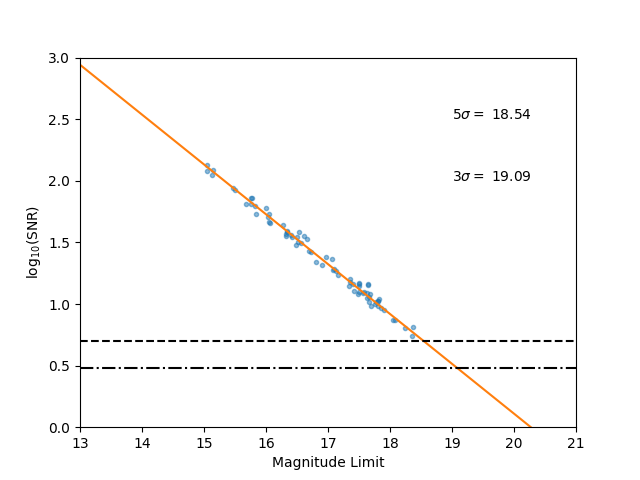

In [19]:
fig, ax = plt.subplots()
cal = ap_photom(data=image,wcs=wcs, header=header,mask =mask,
                    threshold=5,cal_model='ckmodel',ax=ax,brightlim=15)

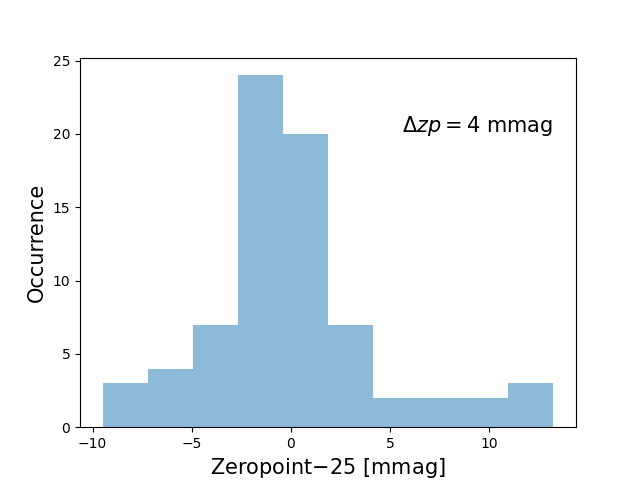

In [21]:
ind = np.isfinite(cal.zps)#~sigma_clip(cal.zps,).mask
std = np.nanstd(cal.zps[ind])
plt.figure()
plt.hist((cal.zps[ind]-25)*10**3,alpha=0.5)
plt.ylabel('Occurrence',fontsize = 15)
plt.xlabel(r'Zeropoint$-25$ [mmag]',fontsize = 15)
plt.text(s=r'$\Delta zp={}$ mmag'.format(int(std*1e3)),x=0.65,y=0.8,fontsize=15,transform=plt.gca().transAxes)
plt.savefig('new_zp_dist.png')

In [16]:
cal.data

array([[2140.80068476, 2139.69377003, 2140.74099587, ..., 2139.45061174,
        2141.46266527, 1575.42054779],
       [2138.91247199, 2138.55769863, 2137.06070048, ..., 2138.24864274,
        2138.79843079, 2139.06598105],
       [2138.76887738, 2139.68164715, 2139.49349141, ..., 2137.85217044,
        2139.38702449, 2138.12837942],
       ...,
       [2139.79661439, 2141.25086266, 2139.14158184, ..., 2140.33658097,
        2139.08577769, 2141.70716531],
       [2139.65521886, 2139.52614002, 2139.29593779, ..., 2140.21918228,
        2140.05435145, 2139.85642399],
       [2140.87894542, 2141.62493712, 2141.02936033, ..., 2138.82690492,
        2138.77771469, 2138.82533743]])

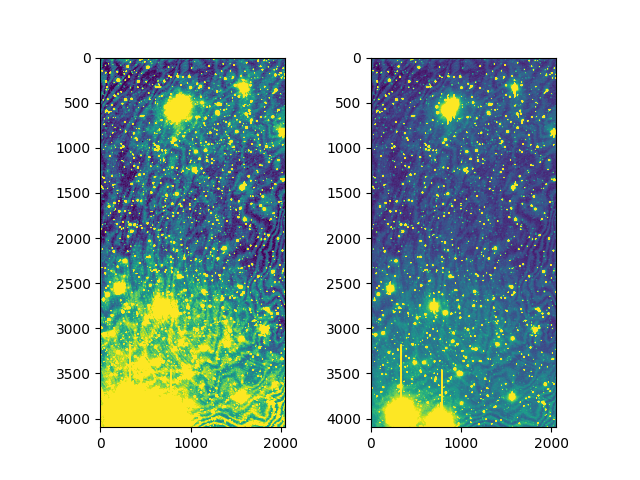

In [15]:
plt.figure()
plt.subplot(121)
plt.imshow(cal.data-cal.data_median,vmin=-1,vmax=1)
plt.subplot(122)
plt.imshow(image - np.nanmedian(image),vmin=-50,vmax=100)

In [20]:
ra = cal.sauron.system_cat['ra'].values
dec = cal.sauron.system_cat['dec'].values
c = SkyCoord(ra,dec, unit="deg")

In [21]:
x,y = wcs.all_world2pix(ra,dec,0)

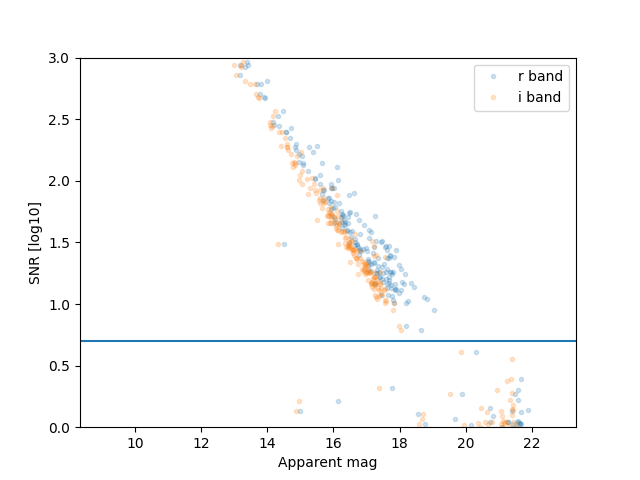

In [22]:
plt.figure()
plt.plot(cal.sauron.cat_mags['r'],np.log10(cal.ap_photom['snr']),'.',alpha=0.2,label='r band')
plt.plot(cal.sauron.cat_mags['i'],np.log10(cal.ap_photom['snr']),'.',alpha=0.2,label='i band')
plt.axhline(np.log10(5))
plt.ylim(0,3)
plt.ylabel('SNR [log10]')
plt.xlabel('Apparent mag')
plt.legend()

id                  15.000000
xcenter            572.064228
ycenter             44.658954
aperture_sum    230829.921722
bkg_median        5409.641003
bkg_std             61.769709
area                40.715041
aper_bkg        220253.754085
counts           10576.167637
e_counts          2514.956215
snr                  4.205309
sysmag             -10.060821
flag                 0.000000
Name: 14, dtype: float64
id                 120.000000
xcenter            470.443165
ycenter            349.735374
aperture_sum    234922.075860
bkg_median        5370.259537
bkg_std             61.021604
area                40.715041
aper_bkg        218650.336105
counts           16271.739755
e_counts          2484.497109
snr                  6.549309
sysmag             -10.528585
flag                 0.000000
Name: 119, dtype: float64
id                 128.000000
xcenter           1699.525609
ycenter            403.481201
aperture_sum    233367.605455
bkg_median        5390.868511
bkg_std            

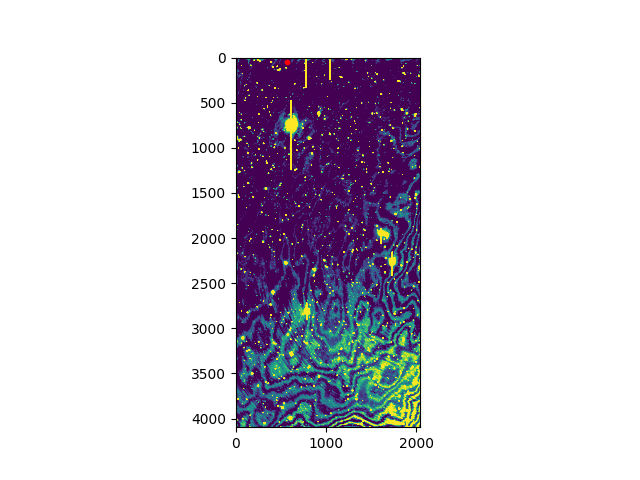

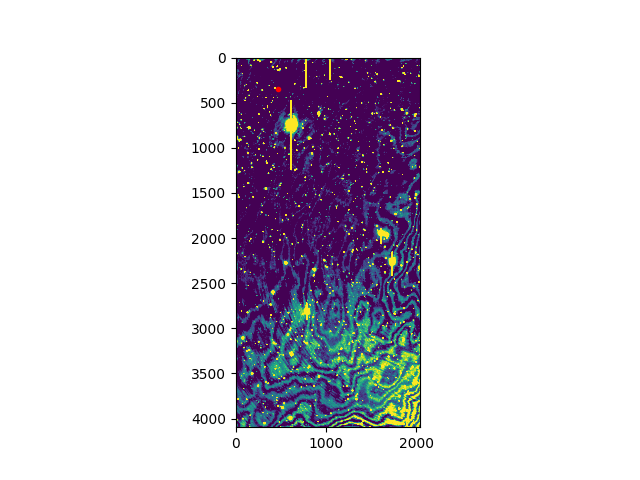

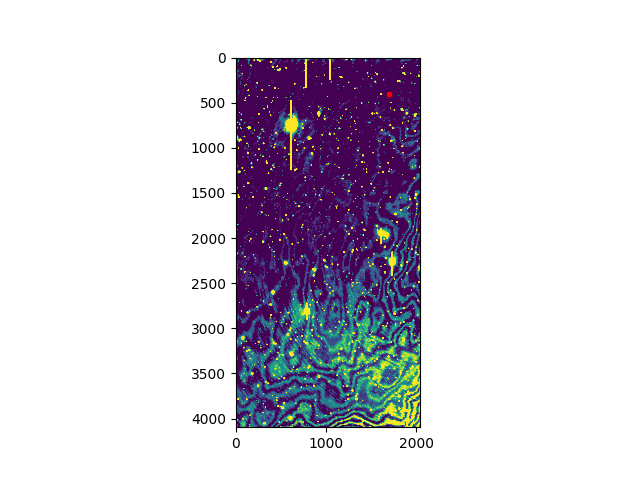

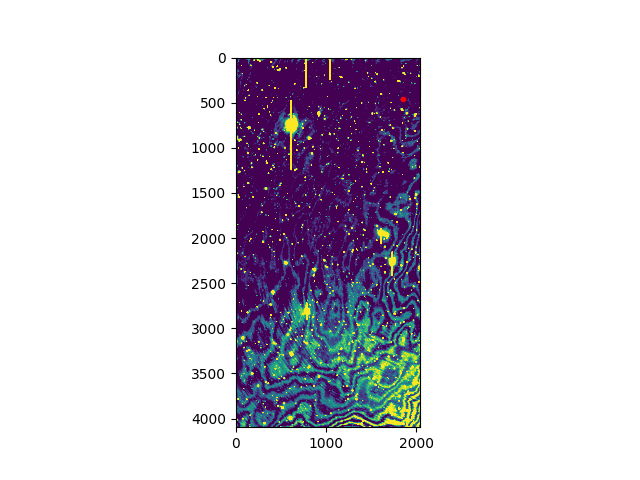

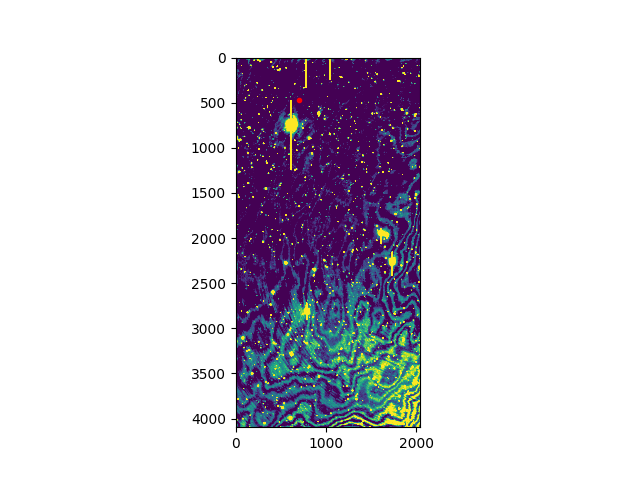

In [9]:
ind = (cal.sauron.cat_mags['i'].values > 20) & (cal.sauron.cat_mags['i'].values < 20.1)
for i in range(5):
    plt.figure()
    plt.imshow(image-cal.data_median,vmin=0,vmax=100)
    plt.plot(x[ind][i],y[ind][i],'r.')
    ap_patches = cal.aperture[ind][i].plot(color='white', lw=2,
                            label='Photometry aperture')
    print(cal.ap_photom.iloc[ind].iloc[i])

(array([ 2.,  0.,  0.,  7., 14., 32., 15.,  3.,  8., 10.,  9.,  5.,  3.,
         2.,  0.,  1.,  1.,  0.,  0.,  2.]),
 array([29.9890483 , 30.01410808, 30.03916785, 30.06422762, 30.08928739,
        30.11434716, 30.13940693, 30.1644667 , 30.18952647, 30.21458625,
        30.23964602, 30.26470579, 30.28976556, 30.31482533, 30.3398851 ,
        30.36494487, 30.39000464, 30.41506442, 30.44012419, 30.46518396,
        30.49024373]),
 <BarContainer object of 20 artists>)

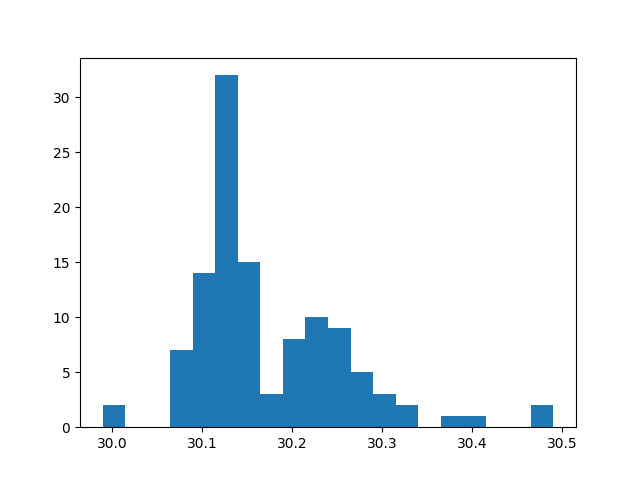

In [10]:
plt.figure()
plt.hist(cal.zps,bins=20)

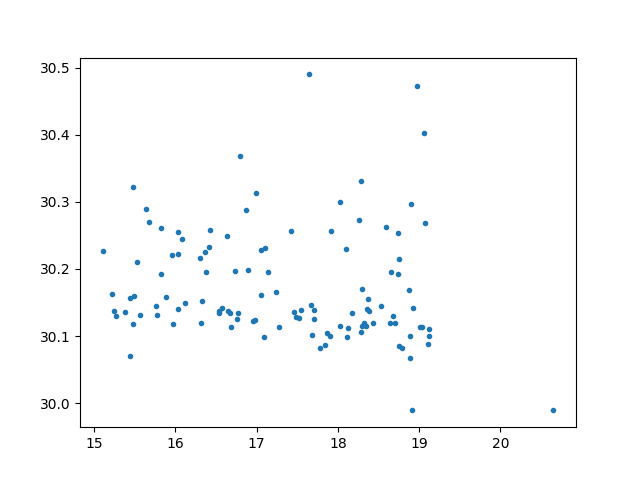

In [11]:
plt.figure()
plt.plot(cal.sauron.cat_mags['r'].values,cal.zps,'.')

In [12]:
gr = (cal.sauron.cat_mags.g  - cal.sauron.cat_mags.r).values

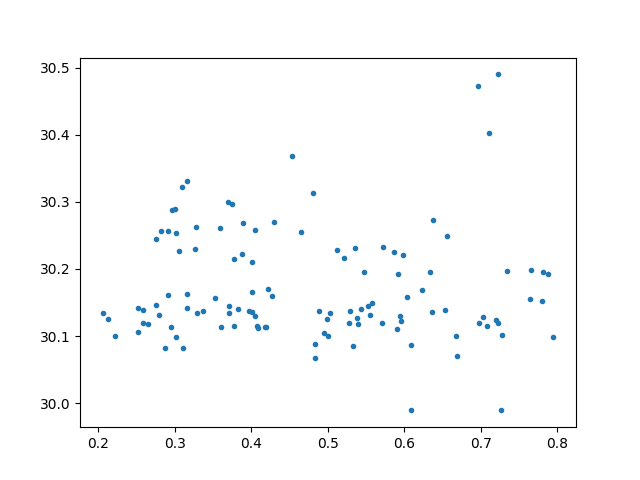

In [13]:
plt.figure()
plt.plot(gr,cal.zps,'.')

In [14]:
big = cal.zps > 30.2
small = (cal.zps < 30.2) & (cal.zps > 0)

In [15]:
zps = cal.pred_mag - cal.ap_photom['sysmag'].values
snr = cal.ap_photom['counts'].values / cal.ap_photom['e_counts'].values
ind = (cal.pred_mag > 14) & (snr > 10)#(cal.pred_mag < 19)
z = zps[ind]
zz = sigma_clip(z).mask
z = z[~zz]

In [16]:
b = np.where(np.isfinite(zps))[0]
b = np.where(big)[0]
s = np.where(np.isfinite(zps))[0]
s = np.where(small)[0]

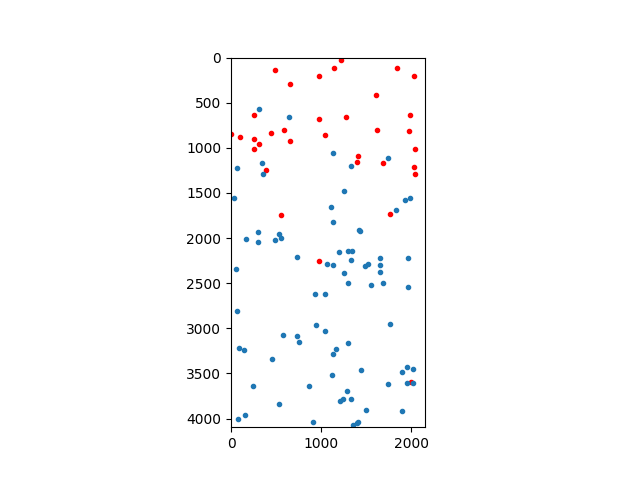

In [17]:
plt.figure()
plt.imshow((image-cal.data_median)*np.nan,vmin=0,vmax=100)
plt.plot(cal.ap_photom.xcenter.iloc[b],cal.ap_photom.ycenter.iloc[b],'r.')
plt.plot(cal.ap_photom.xcenter.iloc[s],cal.ap_photom.ycenter.iloc[s],'C0.')
ax = plt.gca()
for i in range(len(b)):
    c = plt.Circle((cal.ap_photom.xcenter.iloc[b[i]],cal.ap_photom.ycenter.iloc[b[i]]), cal.radius, color='r',fill=False)
    ax.add_patch(c)

    c = plt.Circle((cal.ap_photom.xcenter.iloc[s[i]],cal.ap_photom.ycenter.iloc[s[i]]), cal.radius, color='C1',fill=False)
    ax.add_patch(c)
    
#plt.plot(cal.ap_photom.xcenter.iloc[ind],cal.ap_photom.ycenter.iloc[ind],'b.')

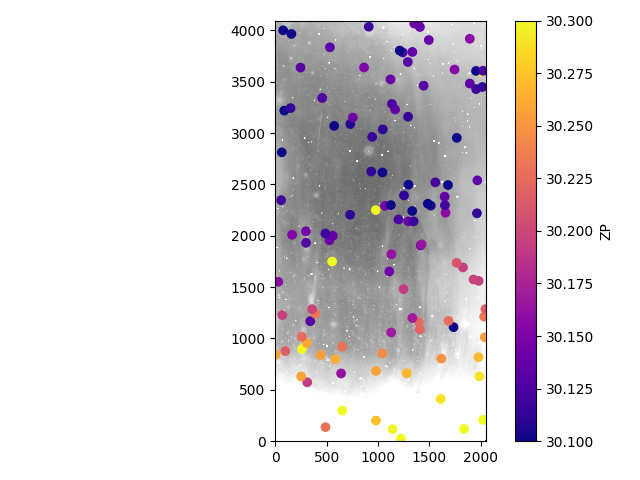

In [120]:
plt.figure()
#plt.imshow((image-cal.data_median)*np.nan,vmin=0,vmax=100,origin='lower')
plt.imshow(1/(flat/np.nanmedian(flat)),vmin=0.8,vmax=1.1,origin='lower',cmap='gray')
plt.scatter(x,y,c=cal.zps,vmin=30.1,vmax=30.3,cmap='plasma')
cbar = plt.colorbar()
cbar.set_label('ZP')
plt.tight_layout()
ax = plt.gca()
ax.set_aspect('equal')
plt.savefig('test_zp_dist.png',bbox_inches='tight')

In [125]:
f = flat / np.nanmedian(flat)

In [136]:
from scipy.optimize import minimize

def minimizer(scale,zpimage,flat): 
    diff = zpimage + (scale*np.log10(flat))
    print(np.nanstd(diff))
    return np.nansum((diff - np.nanmedian(zpimage))**2)


def optimize_zp(zpimage,flat):
    x0 = 0
    res = minimize(minimizer,x0,args=(zpimage,flat))
    return res.x


scale = optimize_zp(zpimage,f)

0.0728906113370034
0.07289061111687482
0.0694621569088733
0.0694621567112829
0.06344548407251248
0.06344548393583213
0.059184412193867386
0.059184412212710265


In [137]:
np.nanstd(zpimage)

0.0728906113370034

In [139]:
test = (scale*np.log10(f))

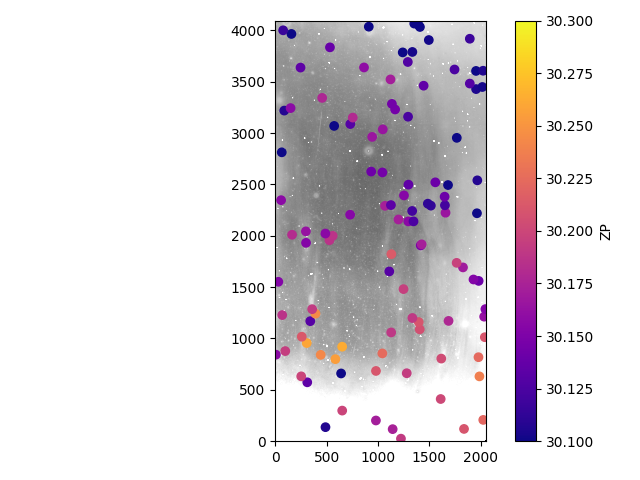

In [155]:
plt.figure()
#plt.imshow((image-cal.data_median)*np.nan,vmin=0,vmax=100,origin='lower')
plt.imshow(1/(flat/np.nanmedian(flat)),vmin=0.8,vmax=1.1,origin='lower',cmap='gray')
plt.scatter(x[ind][m],y[ind][m],c=(cal.zps+test[y.astype(int),x.astype(int)])[ind][m],vmin=30.1,vmax=30.3,cmap='plasma')
cbar = plt.colorbar()
cbar.set_label('ZP')
plt.tight_layout()
ax = plt.gca()
ax.set_aspect('equal')
plt.savefig('test_zp_dist.png',bbox_inches='tight')

In [153]:
eh = (cal.zps+test[y.astype(int),x.astype(int)])[ind]
m = ~sigma_clip(eh).mask

np.nanstd(eh[m])

0.047010116564412646

In [149]:
test

array([[-0.34750889, -0.16121653, -0.14767753, ..., -0.10515576,
        -0.13156072,         nan],
       [-0.27438023, -0.16583557, -0.1668013 , ..., -0.13613184,
        -0.14981805, -0.3037391 ],
       [-0.17623109, -0.17044959, -0.17792813, ..., -0.13647266,
        -0.13923559, -0.24008097],
       ...,
       [ 0.01924181,  0.0050619 , -0.00793078, ..., -0.04772574,
        -0.02758949, -0.02761646],
       [ 0.01536972,  0.00132704, -0.01183389, ..., -0.04091949,
        -0.05392177, -0.05205504],
       [-0.01373974,  0.01140144,  0.00898505, ..., -0.04237497,
        -0.02794023, -0.04438413]])

In [148]:
eh = cal.zps
m = ~sigma_clip(eh).mask

np.nanstd(eh[m])

0.06770616025900932

In [143]:
np.nanstd(cal.zps+test[y.astype(int),x.astype(int)])

0.07723485053648098

In [24]:
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
def function(data, a, b, c):
    x = data[0]
    y = data[1]
    return a * (x**b) * (y**c)

<ipython-input-156-dc67e6f5acc3>:20: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'Zeropoint')

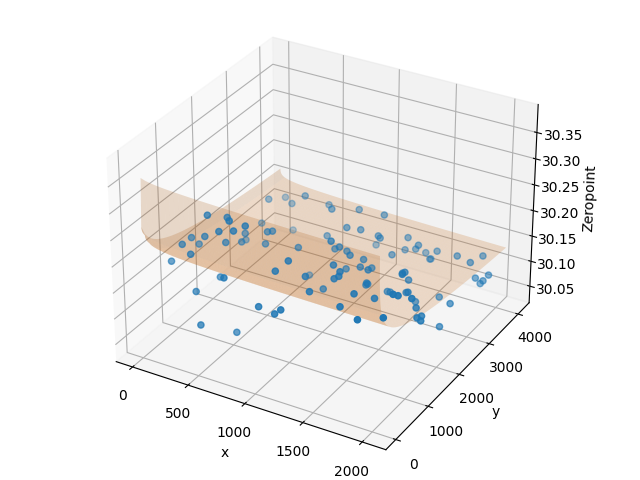

In [156]:
ind = np.isfinite(cal.zps)

x_data = x[ind]
y_data = y[ind]
z_data = cal.zps[ind] + test[y.astype(int),x.astype(int)][ind]
parameters, covariance = curve_fit(function, [x_data, y_data], z_data)

# create surface function model
# setup data points for calculating surface model
model_x_data = np.arange(0, image.shape[1])
model_y_data = np.arange(0, image.shape[0])
# create coordinate arrays for vectorized evaluations
X, Y = np.meshgrid(model_x_data, model_y_data)
# calculate Z coordinate array
Z = function(np.array([X, Y]), *parameters)

# setup figure object
fig = plt.figure()
# setup 3d object
ax = Axes3D(fig)
# plot surface
ax.plot_surface(X, Y, Z,alpha=0.2,color='C1')
# plot input data
ax.scatter(x_data[m], y_data[m], z_data[m], color='C0')
# set plot descriptions
ax.set_xlabel('x')
ax.set_ylabel('y ')
ax.set_zlabel('Zeropoint')

In [ ]:
function(np.array([X, Y]), *parameters)

<ipython-input-76-494dd7c588f2>:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0, 'Zeropoint')

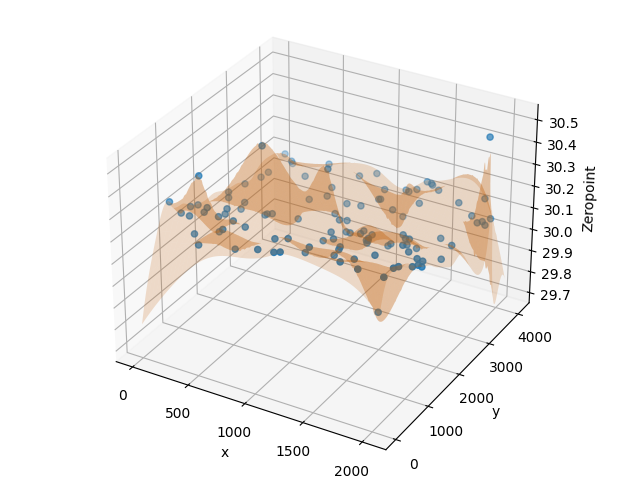

In [76]:
from scipy import interpolate
spline = interpolate.Rbf(x_data,y_data,z_data,function='thin_plate',smooth=0.1)
ZZ = spline(X,Y)

fig = plt.figure()
# setup 3d object
ax = Axes3D(fig)
# plot surface
ax.plot_surface(X, Y, ZZ,alpha=0.2,color='C1')
# plot input data
ax.scatter(x_data, y_data, z_data, color='C0')
# set plot descriptions
ax.set_xlabel('x')
ax.set_ylabel('y ')
ax.set_zlabel('Zeropoint')

array([1039.8389019 , 1837.35861724,   17.36960387, ...,  719.52836057,
       1484.84946129, 1905.92734799])

In [166]:
cal.data.shape

(4096, 2048)

In [158]:
from scipy.ndimage import gaussian_filter
from scipy.interpolate import griddata
x_data = (cal.ap_photom['xcenter'].values[ind] + 0.5).astype(int)
y_data = (cal.ap_photom['ycenter'].values[ind] + 0.5).astype(int)
z_data = cal.zps[ind]
# create grid of x,y,z data
x_grid = np.arange(0, cal.data.shape[1])
y_grid = np.arange(0, cal.data.shape[0])
zpimage = np.zeros_like(cal.data)
zpimage[y_data,x_data] = z_data
zpimage[zpimage==0] = np.nan
#zpimage[cut.mask] = np.nan

x = np.arange(0, image.shape[1])
y = np.arange(0, image.shape[0])
arr = np.ma.masked_invalid(zpimage)
xx, yy = np.meshgrid(x, y)
#get only the valid values
x1 = xx[~arr.mask]
y1 = yy[~arr.mask]
newarr = arr[~arr.mask]

estimate = griddata((x_data, y_data), newarr.ravel(),
                            (xx, yy),method='linear')
bitmask = np.zeros_like(image,dtype=int)
bitmask[np.isnan(estimate)] = 128 | 4
nearest = griddata((x1, y1), newarr.ravel(),
                            (xx, yy),method='nearest')

estimate[np.isnan(estimate)] = nearest[np.isnan(estimate)]

estimate = gaussian_filter(estimate,100)

In [179]:
from scipy.ndimage import gaussian_filter
from scipy.interpolate import griddata

def Fit_surface(cal,mask,smoother=100):
    ind = np.isfinite(cal.zps)
    if mask is not None:
        ind = ind & mask
    x_data = (cal.ap_photom['xcenter'].values[ind] + 0.5).astype(int)
    y_data = (cal.ap_photom['ycenter'].values[ind] + 0.5).astype(int)
    z_data = cal.zps[ind]
    
    zpimage = np.zeros_like(cal.data)
    zpimage[y_data,x_data] = z_data
    zpimage[zpimage==0] = np.nan
    #zpimage[cut.mask] = np.nan

    x = np.arange(0, image.shape[1])
    y = np.arange(0, image.shape[0])
    arr = np.ma.masked_invalid(zpimage)
    xx, yy = np.meshgrid(x, y)
    #get only the valid values
    x1 = xx[~arr.mask]
    y1 = yy[~arr.mask]
    newarr = arr[~arr.mask]

    estimate = griddata((x_data, y_data), newarr.ravel(),
                                (xx, yy),method='linear')
    bitmask = np.zeros_like(image,dtype=int)
    bitmask[np.isnan(estimate)] = 128 | 4
    nearest = griddata((x1, y1), newarr.ravel(),
                                (xx, yy),method='nearest')

    estimate[np.isnan(estimate)] = nearest[np.isnan(estimate)]

    estimate = gaussian_filter(estimate,smoother)

    return estimate, bitmask

In [201]:
tmp = Fit_surface(cal,None,smoother=200)
x_data = (cal.ap_photom['xcenter'].values + 0.5).astype(int)
y_data = (cal.ap_photom['ycenter'].values + 0.5).astype(int)
diff = (cal.zps - tmp[y_data.astype(int),x_data.astype(int)])
cut = ~sigma_clip(diff,sigma=2).mask
estimate = Fit_surface(cal,cut,smoother=50)

In [202]:
test = (cal.zps - estimate[y_data.astype(int),x_data.astype(int)])
np.nanstd(test[cut])

0.007386155719645425

In [204]:
np.nanmedian(test[cut])

0.0006301061937676877

<ipython-input-213-385eaff1eb41>:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
<ipython-input-213-385eaff1eb41>:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


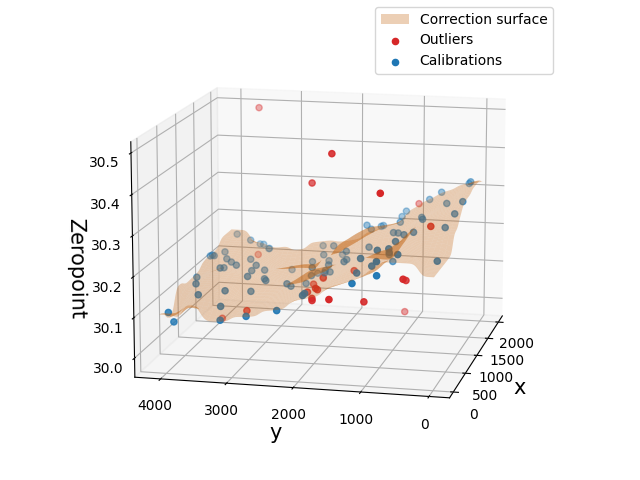

In [213]:
fig = plt.figure()
# setup 3d object
ax = Axes3D(fig)
# plot surface
#ax.plot_surface(xx, yy, tmp,alpha=0.5,color='C1')
surf = ax.plot_surface(xx, yy, estimate,alpha=0.3,color='C1',label='Correction surface')
surf._facecolors2d = surf._facecolor3d
surf._edgecolors2d = surf._edgecolor3d
# plot input data
ax.scatter(x_data[~cut], y_data[~cut], cal.zps[~cut], color='C3',label='Outliers')
ax.scatter(x_data[cut], y_data[cut], cal.zps[cut], color='C0',label='Calibrations')
# set plot descriptions
ax.set_xlabel('x',fontsize=15)
ax.set_ylabel('y ',fontsize=15)
ax.set_zlabel('Zeropoint',fontsize=15)
ax.legend()
ax.view_init(elev=13.,azim=-167)
plt.tight_layout()

In [233]:
e = (estimate - 25)
ec = 10**(e/-2.5)

In [234]:
np.nanmax(ec)

0.009371506074020205

In [230]:
estimate

array([[30.2274119 , 30.2274119 , 30.2274119 , ..., 30.31794588,
        30.3179396 , 30.31793646],
       [30.2274119 , 30.2274119 , 30.2274119 , ..., 30.31794505,
        30.31793877, 30.31793563],
       [30.2274119 , 30.2274119 , 30.2274119 , ..., 30.3179434 ,
        30.31793711, 30.31793397],
       ...,
       [30.09771955, 30.09771916, 30.09771837, ..., 30.15830833,
        30.15830833, 30.15830833],
       [30.09771966, 30.09771926, 30.09771847, ..., 30.15830833,
        30.15830833, 30.15830833],
       [30.09771971, 30.09771931, 30.09771852, ..., 30.15830833,
        30.15830833, 30.15830833]])

<ipython-input-47-e16a9db7401c>:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


ValueError: Argument Z must be 2-dimensional.

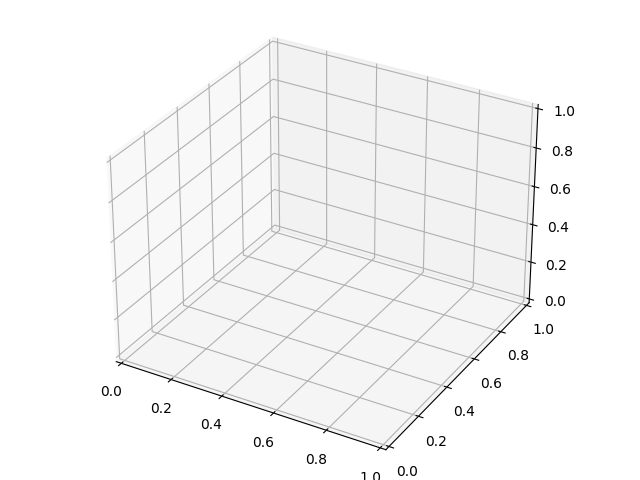

In [47]:
# fit a spline to 3d data
from scipy.interpolate import griddata
x_data = x[ind]
y_data = y[ind]
z_data = cal.zps[ind]
# create grid of x,y,z data
x_grid = np.linspace(min(x_data), max(x_data), 30)
y_grid = np.linspace(min(y_data), max(y_data), 30)
z_grid = griddata((x_data, y_data), z_data, (x_grid[None,:], y_grid[:,None]), method='cubic')
# plot surface
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x_grid, y_grid, z_grid,alpha=0.2,color='C1')
# plot input data
#ax.scatter(x_data, y_data, z_data, color='C0')
# set plot descriptions
ax.set_xlabel('x')
ax.set_ylabel('y ')
ax.set_zlabel('Zeropoint')


In [48]:
Z.shape

(30, 30)

In [45]:
z_grid.shape

(30, 30)

In [16]:
plt.figure()
plt.imshow(image,vmin=5300,vmax=5800)

ap_patches = cal.aperture.plot(color='white', lw=2,
                           label='Photometry aperture')
ann_patches = cal.sky_ap.plot(color='red', lw=2,
                                    label='Background annulus')

<IPython.core.display.Javascript object>

In [1]:
image

NameError: name 'image' is not defined

<IPython.core.display.Javascript object>


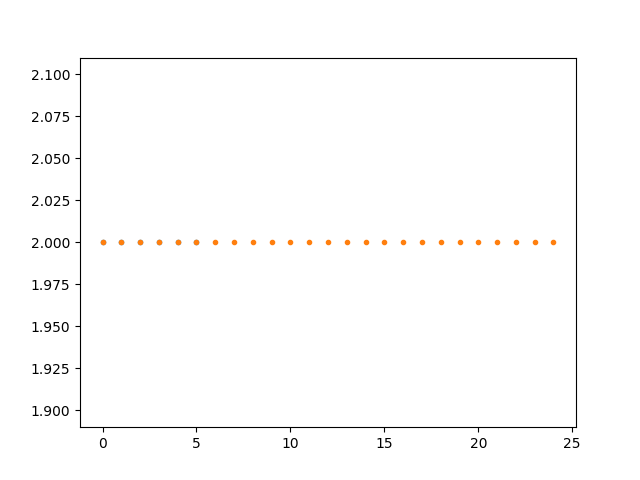

In [43]:
plt.figure()
plt.plot(cal.radii[big],'.')
plt.plot(cal.radii[small],'.')

In [45]:
np.nanmedian(cal.radii)

2.0

<IPython.core.display.Javascript object>


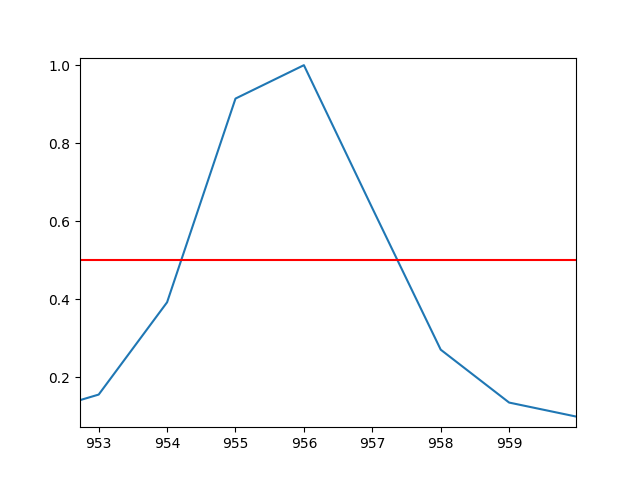

In [31]:
plt.figure()
plt.plot(image[:,305]/np.nanmax(image[:,305]))
plt.axhline(0.5,color='r')

In [25]:
len(cal.zps)

945

<IPython.core.display.Javascript object>


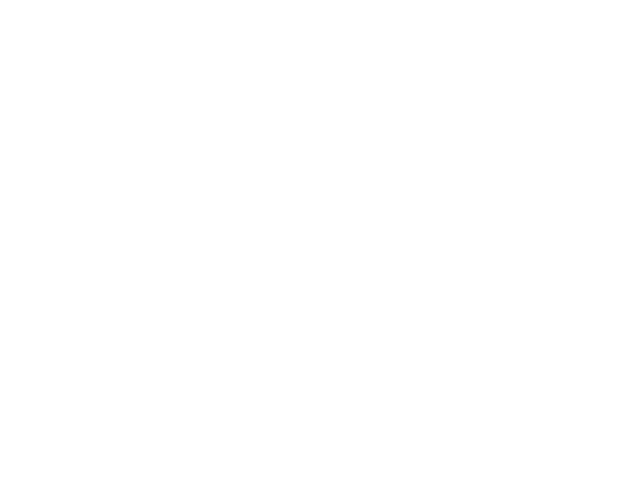

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1159 but corresponding boolean dimension is 945

In [24]:
ind = ~sigma_clip(cal.radii).mask
plt.figure()
plt.hist(cal.radii[big])

In [ ]:
np.nanmedian()

<IPython.core.display.Javascript object>


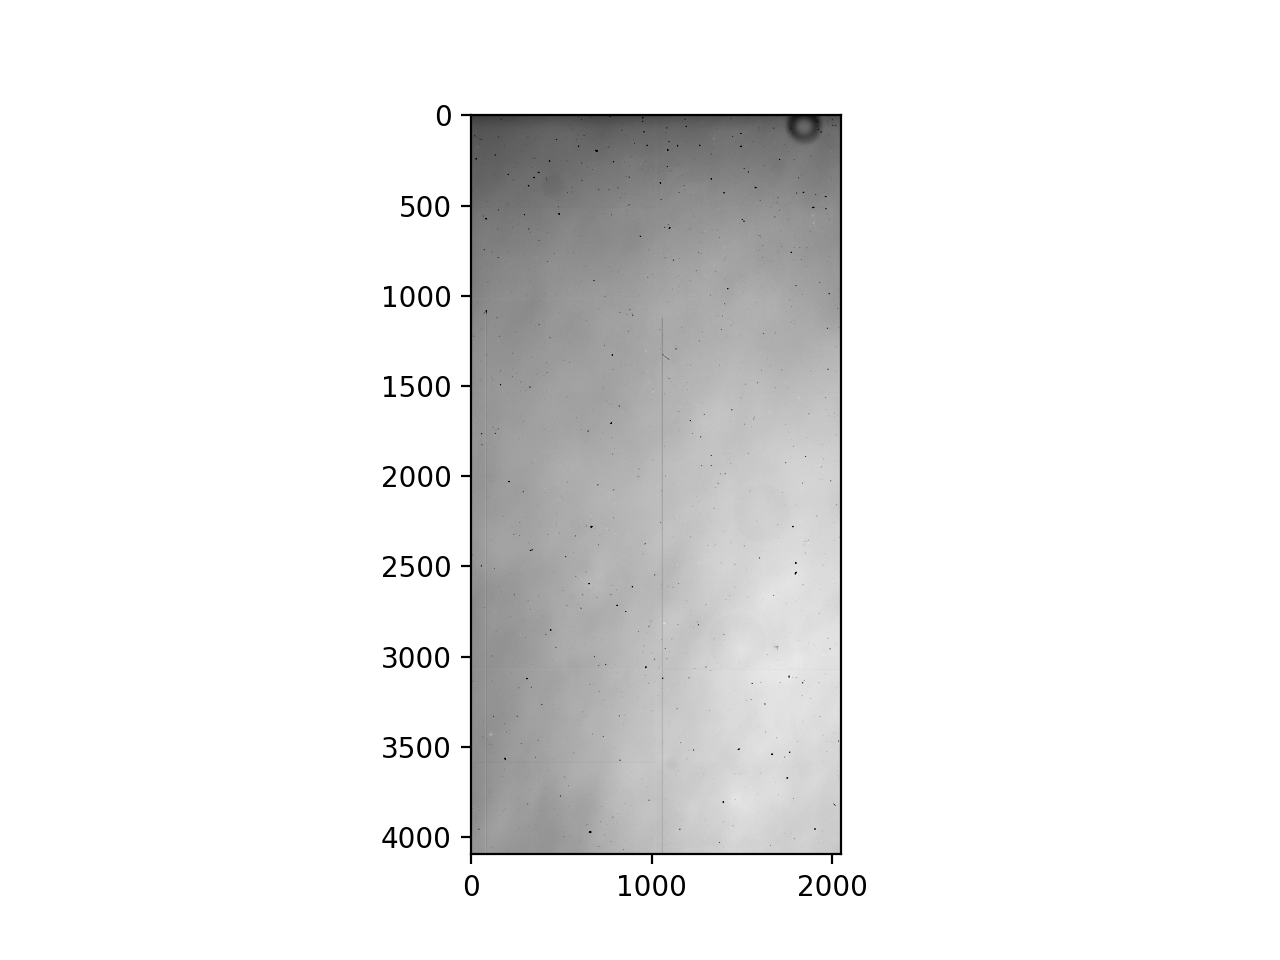

In [36]:
plt.figure()
plt.imshow((flat/np.nanmedian(flat)),vmin=0.8,vmax=1.1,cmap='gray')
#plt.plot(cal.ap_photom.xcenter.iloc[big],cal.ap_photom.ycenter.iloc[big],'r.')


In [44]:
wcs.all_pix2world(819,1731,0)

[array(350.99527063), array(-14.99799573)]

<IPython.core.display.Javascript object>


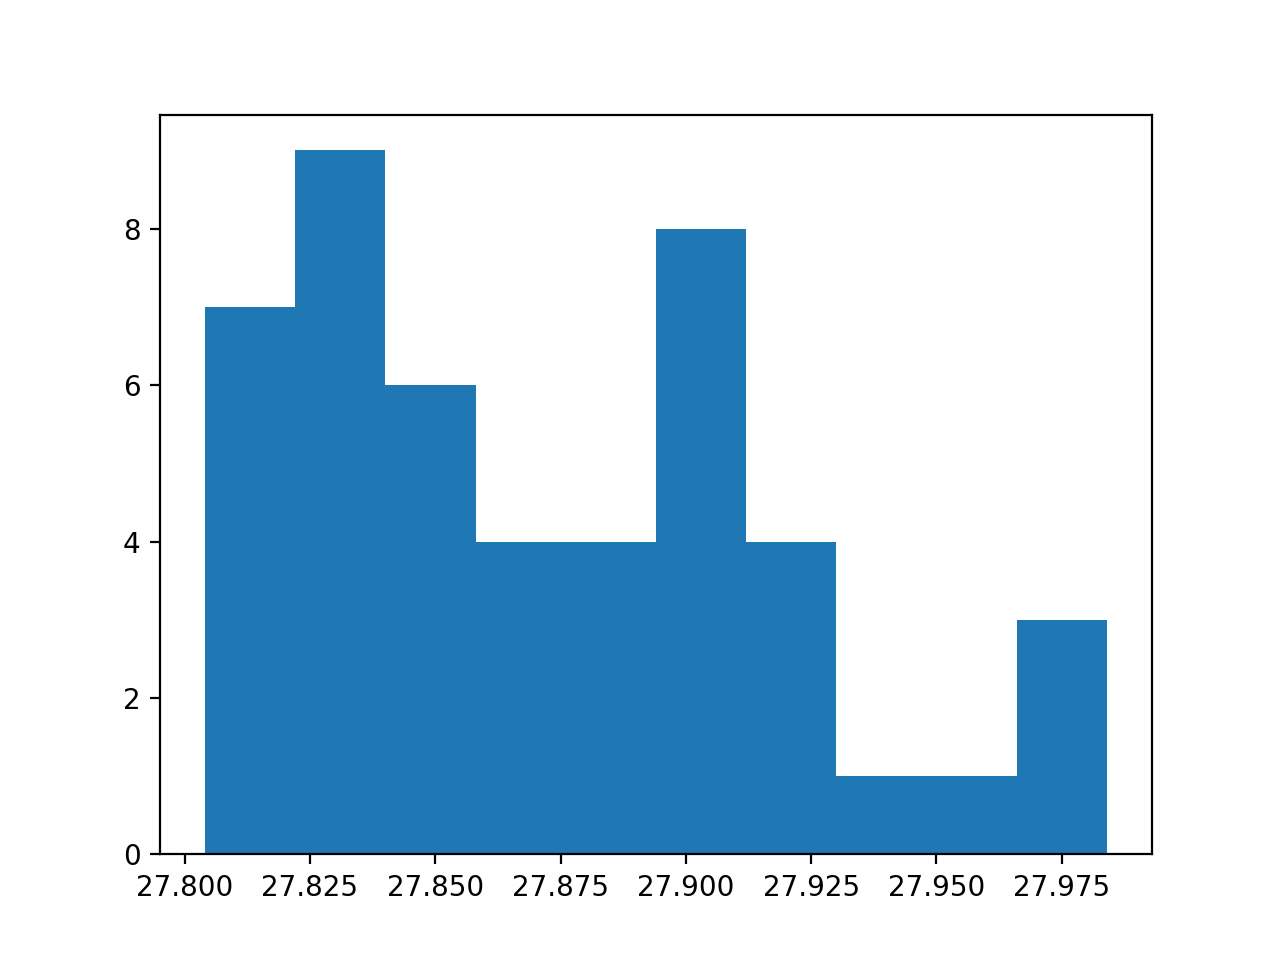

(array([7., 9., 6., 4., 4., 8., 4., 1., 1., 3.]),
 array([27.80408417, 27.82207662, 27.84006907, 27.85806153, 27.87605398,
        27.89404643, 27.91203888, 27.93003134, 27.94802379, 27.96601624,
        27.98400869]),
 <BarContainer object of 10 artists>)

In [22]:
plt.figure()
plt.hist(cal.zps[~big])

In [46]:
cal.sauron.cat_mags.iloc[big]

_RAJ2000   _DEJ2000          ra        dec        g        r        i  \
8    350.714099 -14.556634  350.714529 -14.556697  17.8854  17.0992  16.8104   
12   350.723004 -14.752354  350.723481 -14.752229  17.7468  16.9671  16.6272   
15   350.730845 -14.450970  350.731511 -14.450986  18.0999  17.4923  17.2490   
19   350.735764 -14.592228  350.735992 -14.592294  18.2347  17.9201  17.8267   
30   350.756393 -14.511348  350.756846 -14.511351  15.2510  14.8464  14.7173   
74   350.830189 -14.604974  350.830201 -14.604917  18.2214  17.9144  17.8009   
81   350.840451 -14.601280  350.840474 -14.601211  16.0278  15.5339  15.3228   
103  350.873708 -14.547020  350.873746 -14.546945  17.8240  17.5807  17.4848   
124  350.905618 -14.521685  350.905683 -14.521553  16.8864  16.1799  15.9013   
151  350.953841 -14.643600  350.953813 -14.643600  18.0700  17.2866  16.9602   
161  350.972339 -14.565419  350.972316 -14.565337  15.7874  15.1983  14.9937   
173  351.003347 -14.595076  351.003337 -14.595026  17.6813  17.3344  17.2166   
178  351.018169 -14.627446  351.018102 -14.627455  16.6521  16.0107  15.7244   
205  351.075804 -14.647628  351.075809 -14.647642  17.6581  17.1573  16.9493   
206  351.077846 -14.450305  351.078253 -14.450104  16.9404  16.5018  16.3317   
207  351.078126 -14.531720  351.078202 -14.531621  17.9225  17.6646  17.5650   
216  351.091799 -14.598837  351.091776 -14.598802  16.5679  16.0953  15.9101   
221  351.102148 -14.455473  351.102517 -14.455320  16.6844  16.3640  16.2371   
227  351.110511 -14.669820  351.110659 -14.669868  14.2697  13.9465  14.6658   
246  351.154305 -14.515330  351.154536 -14.515230  14.6582  14.2919  14.1569   
247  351.154116 -14.741200  351.154132 -14.741149  15.3563  14.9058  14.7371   
259  351.185025 -14.460845  351.185310 -14.460743  16.0316  15.6573  15.5286   
269  351.198187 -14.683953  351.198356 -14.683958  17.0615  16.5487  16.3640   
321  351.302281 -14.724318  351.302237 -14.724276  18.5003  17.9718  17.7316   
336  351.325619 -14.488687  351.325824 -14.488736  17.7366  17.0942  16.8370   
344  351.339729 -14.535713  351.339708 -14.535822  16.3900  15.9927  15.8021   
353  351.350949 -14.581610  351.350986 -14.581696  16.2597  15.8976  15.7519   
369  351.374190 -14.643545  351.373921 -14.643606  17.8727  17.3947  17.1925   
378  351.383449 -14.706299  351.383175 -14.706172  17.9480  17.5794  17.4198   

           z        y     g_e     r_e     i_e     z_e     y_e  
8    16.6792  16.5597  0.0078  0.0049  0.0025  0.0121  0.0085  
12   16.4751  16.3586  0.0127  0.0040  0.0023  0.0055  0.0083  
15   17.1511  17.0740  0.0063  0.0038  0.0029  0.0070  0.0122  
19   17.8212  17.8215  0.0153  0.0066  0.0087  0.0085  0.0112  
30   14.7452  14.6691  0.0060  0.0043  0.0036  0.0125  0.0062  
74   17.7638  17.7723  0.0093  0.0070  0.0043  0.0057  0.0168  
81   15.2549  15.1995  0.0044  0.0076  0.0030  0.0050  0.0036  
103  17.4844  17.4850  0.0234  0.0059  0.0045  0.0096  0.0091  
124  15.7992  15.7044  0.0076  0.0032  0.0022  0.0024  0.0027  
151  16.8405  16.7288  0.0196  0.0055  0.0033  0.0065  0.0069  
161  14.9293  14.8741  0.0038  0.0024  0.0018  0.0037  0.0026  
173  17.1907  17.1567  0.0049  0.0042  0.0020  0.0059  0.0188  
178  15.6001  15.5106  0.0041  0.0034  0.0031  0.0078  0.0028  
205  16.8820  16.8274  0.0057  0.0059  0.0031  0.0055  0.0085  
206  16.2845  16.2310  0.0058  0.0026  0.0022  0.0032  0.0060  
207  17.5389  17.5675  0.0053  0.0001  0.0039  0.0099  0.0098  
216  15.8656  15.8093  0.0040  0.0036  0.0029  0.0090  0.0090  
221  16.2342  16.2064  0.0022  0.0041  0.0033  0.0036  0.0039  
227  13.5151  13.4559  0.0035  0.0012  0.0000  0.0210  0.0025  
246  14.1569  14.1442  0.0027  0.0005  0.0022  0.0041  0.0048  
247  14.7040  14.6503  0.0038  0.0032  0.0014  0.0054  0.0031  
259  15.5241  15.4744  0.0046  0.0039  0.0022  0.0106  0.0069  
269  16.3216  16.2648  0.0049  0.0038  0.0022  0.0061  0.0057  
321  17.6781  17.5949  0.0060  0.0047  0.0042  0.0097  0.0090  
336  1

In [41]:
np.nansum((mask & 2)> 0) / (mask.shape[0]*mask.shape[1])

0.0017232894897460938

In [5]:
a =np.array([1,2,4])
b =np.array([5,3,5])

In [6]:
np.nanmax([a,b])

5

In [11]:
b=np.nanmin(a,axis=1)
c = np.where()

In [18]:
a[b[np.newaxis,:]]

array([[[1, 2, 4],
        [5, 3, 5]]])

In [15]:
b.shape

(2,)

In [12]:
cat = cal.sauron.cat_mags
sig_noise = (cal.ap_photom['counts'] / cal.ap_photom['e_counts']).values

<IPython.core.display.Javascript object>


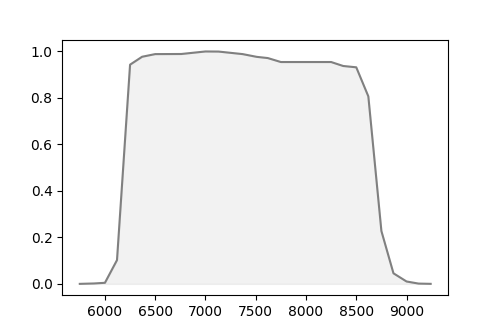

AttributeError: 'sauron' object has no attribute '_sys_bands'

In [36]:
cal.sauron.coverage_plot()

<IPython.core.display.Javascript object>


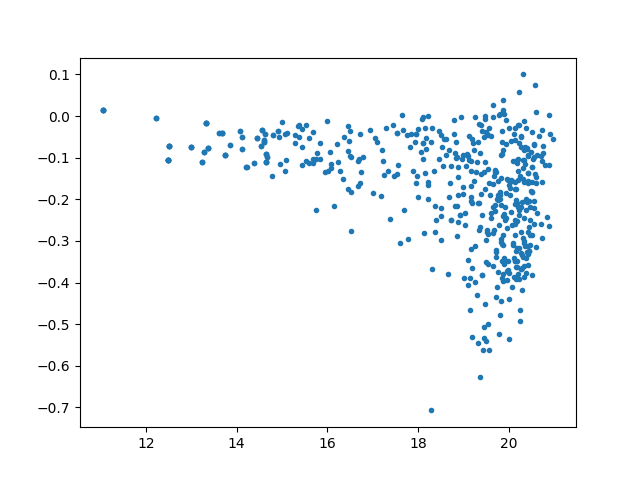

In [35]:
plt.figure()
plt.plot(cat['z'],cat['z']-cal.pred_mag,'.')

In [39]:
b

array([   4,   23,   49,   52,   72,  131,  161,  173,  190,  243,  254,
        295,  327,  345,  374,  378,  386,  409,  477,  479,  487,  488,
        494,  522,  540,  542,  545,  547,  589,  591,  601,  607,  619,
        651,  676,  688,  697,  732,  746,  747,  774,  775,  813,  817,
        825,  840,  850,  892,  903,  915,  937,  940,  955, 1004, 1020,
       1045, 1135, 1148, 1180, 1219, 1227, 1239, 1248, 1257, 1272, 1308,
       1312, 1315])

<IPython.core.display.Javascript object>


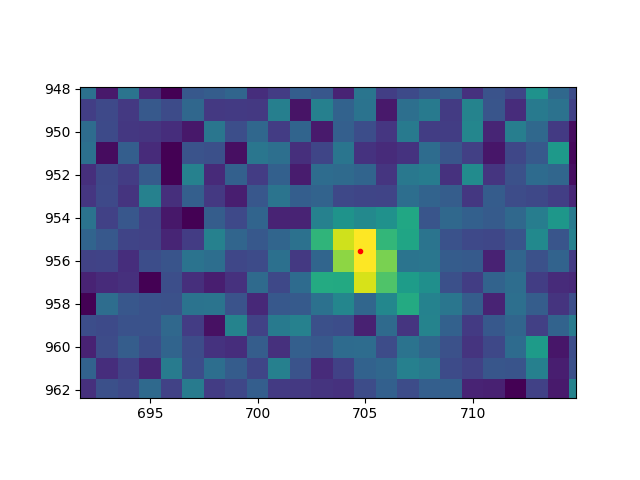

In [43]:
ind = cal.pred_mag >= 21
plt.figure()
plt.imshow(image,vmin=5300,vmax=5800)
plt.plot(x[ind],y[ind],'r.')
b = np.where(ind)[0]
for i in range(len(b)):
    c = plt.Circle((cal.ap_photom.xcenter.iloc[b[i]],cal.ap_photom.ycenter.iloc[b[i]]), cal.radii[b[i]], color='r',fill=False)
    ax.add_patch(c)
    c = plt.Circle((cal.ap_photom.xcenter.iloc[b[i]],cal.ap_photom.ycenter.iloc[b[i]]), cal.radii[b[i]]*4, color='C2',fill=False)
    ax.add_patch(c)
    c = plt.Circle((cal.ap_photom.xcenter.iloc[b[i]],cal.ap_photom.ycenter.iloc[b[i]]), cal.radii[b[i]]*10, color='C2',fill=False)
    ax.add_patch(c)

In [21]:
sig_noise[ind]

array([ 3.64065975e-01,  2.67391135e+00,  4.21299547e-01,  2.35053099e+00,
        1.23315311e+00,  1.88374358e+00,  1.47811431e+00,  1.55638729e+00,
        1.67550280e+00,  2.08925333e+00,  1.42392205e+00,  4.59437909e-01,
        1.49471716e+00,  1.92640448e+00,  1.99010755e+00,  2.87129857e-01,
        8.42181666e-01,  1.70559904e+00,  1.73357930e+00,  1.15532816e+00,
       -8.85642553e-01, -3.48755123e+00,  1.61964703e-01,  3.99892257e+00,
        1.31609108e+00,  3.39946424e+00,  1.83464346e+00,  1.71208379e+00,
        2.17537885e+00, -4.45770558e-01,  1.38299353e+00,  2.45648667e+00,
        2.59645807e+00,  4.19228786e-01,  1.43284662e+00,  1.11617325e+00,
        9.06763056e-01,  1.39719157e-01,  1.60978424e+00,  1.31555011e+00,
        2.08582227e+00,  1.46193709e+00,  4.09742240e-01,  1.66136609e+00,
        9.00134823e-01,  6.74955838e-01,  1.88916391e-01,  1.75149529e+00,
        1.66295716e+00,  7.67743480e-05,  2.32350299e+00,  1.80704883e+00,
        6.32705748e-01,  

In [30]:
a[ind]

array([  66.30414492,   61.25404891,   70.82836076,   57.36841886,
         60.56365933,   57.61149709,   90.83457762,   61.09496951,
         75.45216036,   62.52964813,   57.41331416,   78.25701886,
         57.99110799,   53.2716359 ,   57.36454094,  313.84300966,
         77.30366338,   62.56947035,   59.27650248,   59.04931351,
         65.85174909,   57.76460222,  165.18422114,   61.42298631,
         54.25245701,   63.77245837,   60.58555212,   60.52580935,
         60.83396448,   56.18878001,   56.36032945,   59.71417835,
         58.7987078 ,   56.2301113 ,   80.76327733,   55.74434034,
         64.98373744,  526.45194938,   52.53733345,   58.61749508,
         64.52060592,   64.69737208,   54.54828319,   55.6941109 ,
         66.12879596,  155.50553974,   56.95294913,   57.98367851,
         54.86223481, 8024.81182329,   63.00495557,   57.39534686,
         55.36588789,   79.07306009,   58.9317447 ,   86.72484161,
         60.89043083, 5690.92400724,   60.03002848,   58.55259

In [24]:
a = cal.ap_photom['bkg_std'].values

In [28]:
m = sigma_clip(a).mask

<IPython.core.display.Javascript object>


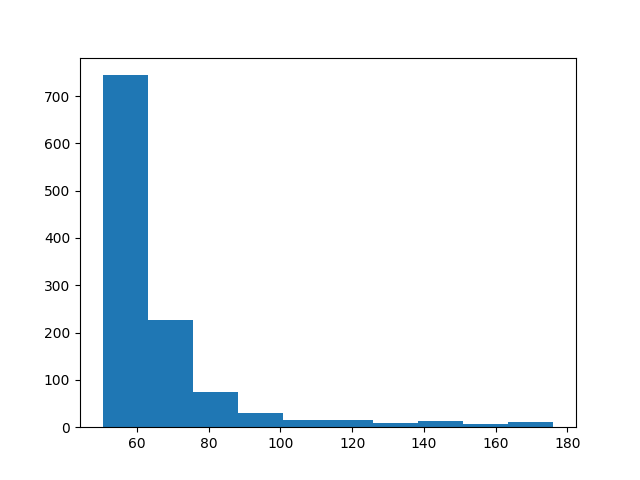

(array([744., 226.,  74.,  30.,  15.,  15.,   8.,  13.,   6.,  10.]),
 array([ 50.4165969 ,  62.98434732,  75.55209773,  88.11984814,
        100.68759856, 113.25534897, 125.82309938, 138.3908498 ,
        150.95860021, 163.52635062, 176.09410104]),
 <BarContainer object of 10 artists>)

In [29]:
plt.figure()
plt.hist(a[~m])

<IPython.core.display.Javascript object>


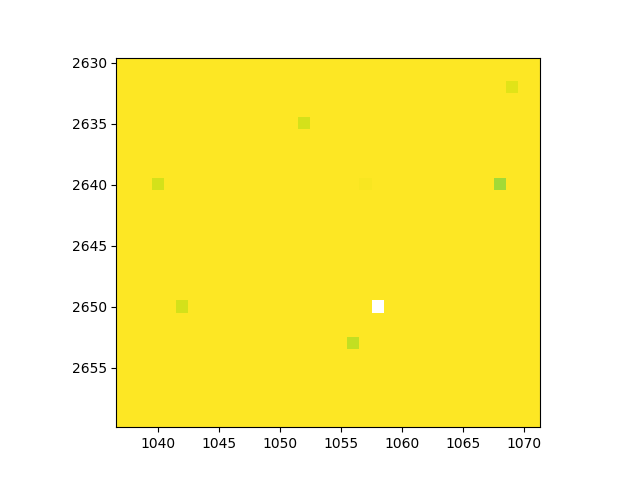

In [12]:
plt.figure()
plt.imshow(flat/e,vmax=100,vmin=50)

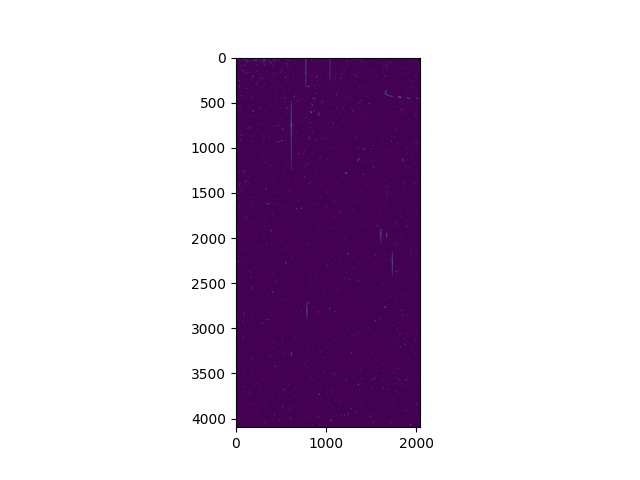

In [13]:
plt.figure()
plt.imshow(cal.sou)

## Assume i band is a good match and calc zp

In [8]:
i = cal.sauron.cat_mags['i'].values
counts = cal.ap_photom['counts'].values
x = cal.ap_photom['xcenter'].values
y = cal.ap_photom['ycenter'].values

In [6]:
testzp = i + 2.5*np.log10(counts)

(array([  1.,   0.,   1.,   1.,  16., 135.,  71.,   7.,   5.,   5.]),
 array([19.72507045, 20.93845194, 22.15183343, 23.36521492, 24.57859641,
        25.7919779 , 27.00535939, 28.21874088, 29.43212237, 30.64550386,
        31.85888535]),
 <BarContainer object of 10 artists>)

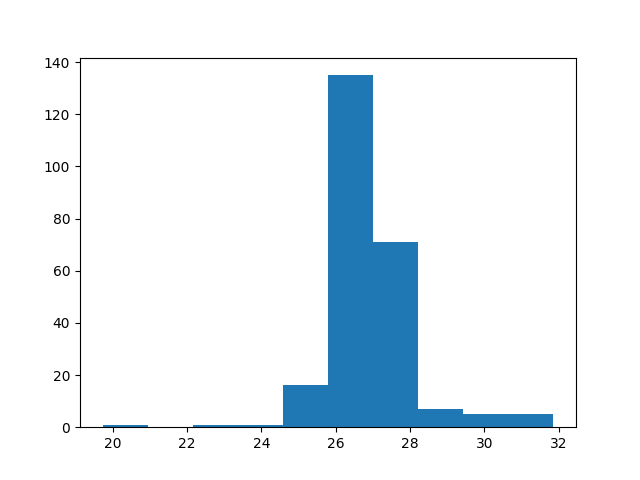

In [10]:
plt.figure()
plt.hist(testzp)

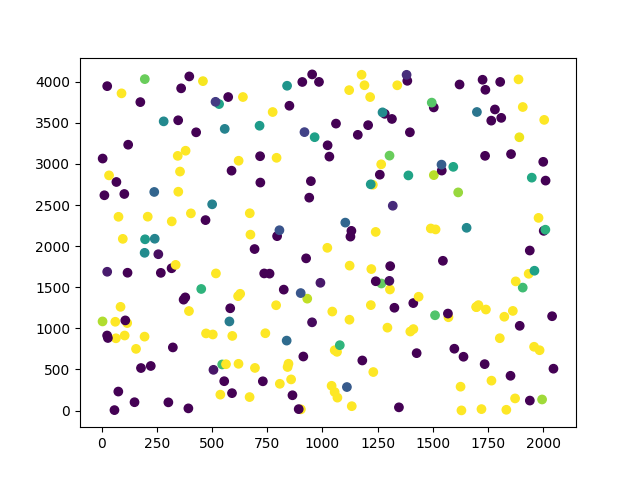

In [13]:
med = np.nanmedian(testzp)
plt.figure()
plt.scatter(x,y,c=testzp,vmin=med-.1,vmax=med+.1)

In [ ]:
# function to fit a line to data
def line(x, m, b):
    return m*x + b
    

In [15]:

# make a class that says hi 
class Hi:
    def __init__(self):
        self.hi = 'hi'
    def say_hi(self):
        print(self.hi)



In [18]:
a = Hi

In [21]:
a.say_hi()

TypeError: say_hi() missing 1 required positional argument: 'self'